In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import collections
import re
from scipy.stats.mstats import winsorize
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import binned_statistic
import glob
from pandas.tseries.offsets import MonthEnd
#import ggplot2
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Empeekay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df_final = pd.DataFrame()
i = 0
for file_name in glob.glob("*.xlsx"):
    print(file_name)
    i = i + 1
    df = pd.merge(pd.read_excel(file_name, sheet_name='listings'), pd.read_excel(file_name, sheet_name='reviews'), on='listing_id')
    if df_final.shape[1] == 0:
        df_final = df
    else:
        df_final = pd.concat([df_final, df], join="inner") 

Jersey_Final.xlsx


In [32]:
df_final = df_final.rename(columns={'host_location': 'location'})
df_final = df_final.groupby('listing_id').head(10)
df_final.to_csv('Final_Dataset.csv', sep=',',index=False)  
reviews_df = df_final
reviews_df['reviews'] = reviews_df['comments']
reviews_df['reviews'] = reviews_df['reviews'].astype(str)
#Removing br
reviews_df['reviews'] = reviews_df['reviews'].str.replace("<br/>", '', regex=True)

# create the label
reviews_df["is_bad_review"] = reviews_df["review_scores_value"].apply(lambda x: 1 if x < 4 else 0)
# create the label
reviews_df["is_good_review"] = reviews_df["review_scores_value"].apply(lambda x: 1 if x > 4 else 0)
# select only relevant columns
reviews_df.head()

,listing_id,name,location,neighbourhood,neighbourhood_cleansed,latitude,longitude,price,review_scores_value,comments,reviews,review_clean,is_bad_review,is_good_review
0,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,"Good location, good price, run down, needs a g...","Good location, good price, run down, needs a g...",good location good price run need good cleaning,0,1
1,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,Great location - 10 minutes to Port Authority ...,Great location - 10 minutes to Port Authority ...,great location minute port authority bus plent...,0,1
2,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,Safe neighborhood <br/>Great commute to the city.,Safe neighborhood Great commute to the city.,safe neighborhood great commute city,0,1
3,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,Estas a 15 minutos en autobus de time square,Estas a 15 minutos en autobus de time square,estas minutos en autobus de time square,0,1
4,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,Julio est un hÃ´te trÃ¨s gentil et rÃ©actif. L...,Julio est un hÃ´te trÃ¨s gentil et rÃ©actif. L...,julio est un hã´te trã¨s gentil et rã©actif l'...,0,1


In [33]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["reviews"].apply(lambda x: clean_text(x))

In [35]:
# Use English stemmer
stemmer = SnowballStemmer("english")
reviews_df['review_clean'] = reviews_df['review_clean'].apply(lambda x: (stemmer.stem(x))) # Stem every word.

In [36]:
reviews_df.head()

,listing_id,name,location,neighbourhood,neighbourhood_cleansed,latitude,longitude,price,review_scores_value,comments,reviews,review_clean,is_bad_review,is_good_review
0,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,"Good location, good price, run down, needs a g...","Good location, good price, run down, needs a g...",good location good price run need good clean,0,1
1,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,Great location - 10 minutes to Port Authority ...,Great location - 10 minutes to Port Authority ...,great location minute port authority bus plent...,0,1
2,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,Safe neighborhood <br/>Great commute to the city.,Safe neighborhood Great commute to the city.,safe neighborhood great commute c,0,1
3,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,Estas a 15 minutos en autobus de time square,Estas a 15 minutos en autobus de time square,estas minutos en autobus de time squar,0,1
4,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,Julio est un hÃ´te trÃ¨s gentil et rÃ©actif. L...,Julio est un hÃ´te trÃ¨s gentil et rÃ©actif. L...,julio est un hã´te trã¨s gentil et rã©actif l'...,0,1


In [38]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sid = SIA()
reviews_df["sentiments"] = reviews_df["review_clean"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [40]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review_clean"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review_clean"].apply(lambda x: len(x.split(" ")))

In [41]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [42]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [43]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.978504
1    0.021496
Name: is_bad_review, dtype: float64

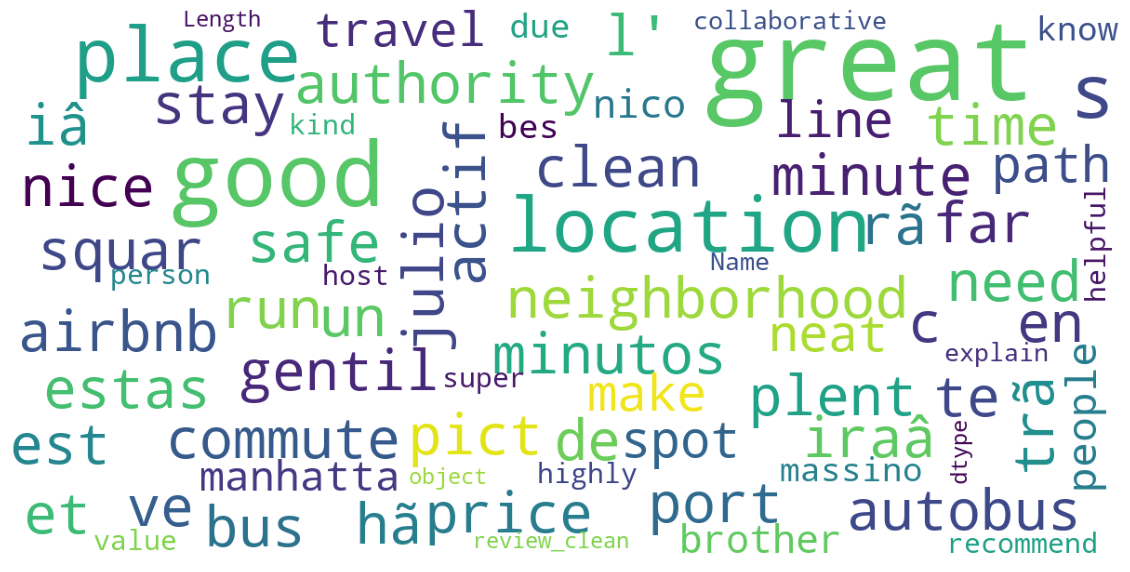

In [44]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["review_clean"])

In [92]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review_clean", "pos", "neighbourhood"]].head(100)

,review_clean,pos,neighbourhood
81793,clean safe staff super lovely help,0.941,"New York, United States"
71108,super good perfect good attent,0.931,"Jersey City, New Jersey, United States"
83773,great stay nice clean comfort,0.924,"Jersey City, New Jersey, United States"
80897,super good host responsive help,0.923,NaN
28359,great location warm comfortable clean,0.923,"New York, United States"
...,...,...,...
58138,amaze stylish property super clean,0.835,"Jersey City, New Jersey, United States"
58695,robert dream rent super easy super responsive ...,0.835,"New York, United States"
42443,amaze hospitality welcome friendly host would ...,0.835,"Jersey City, New Jersey, United States"
76010,clean great location friendly staff,0.833,NaN


<AxesSubplot:>

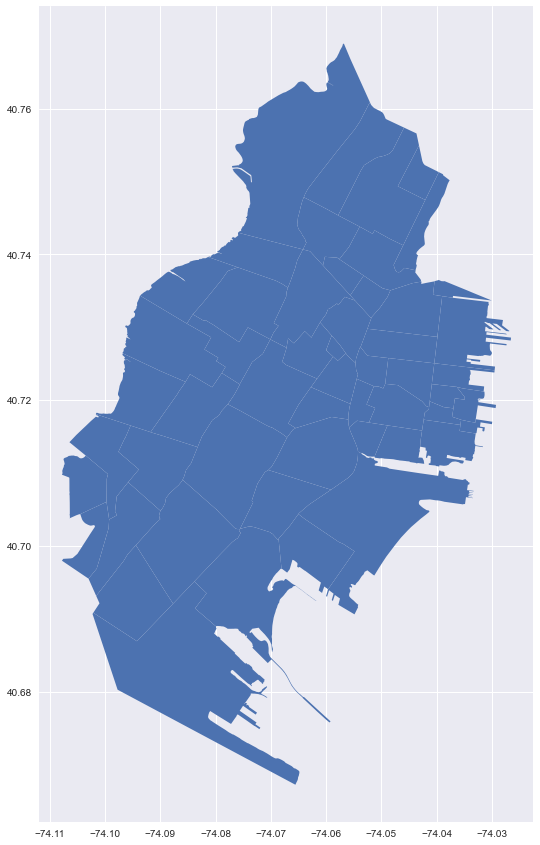

In [102]:
street_map = gpd.read_file('jersey-city-neighborhoods.shp')
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)

In [89]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review_clean", "neg"]].head(100)

,review_clean,neg
87922,many problem really ruin stay avoid loc,0.698
71341,recommend stay worst airbnb super incredibly r...,0.614
65948,horrible host cancel within minute offer refund,0.524
61871,sadly place nothing like expect much darker di...,0.500
82378,need cancel due illness reach jimmy respond,0.480
...,...,...
84014,book view insane clean plus shuttle come every...,0.259
50701,secret former residence naval officer neighbor...,0.259
58460,pay park day stay sheâ€™s slow respond stay we...,0.259
60304,comfortable also convenient bus stop,0.259


In [105]:
geometry = [Point(xy) for xy in zip(reviews_df["longitude"], df["latitude"])]
crs = {'init' : 'epsg:4326'}

In [106]:
geo_df = gpd.GeoDataFrame(reviews_df,
                         crs = crs,
                         geometry = geometry)
geo_df.head()

C:\Users\Empeekay\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,listing_id,name,location,neighbourhood,neighbourhood_cleansed,latitude,longitude,price,review_scores_value,comments,...,word_ð¾ð,word_ð¾ñ,word_ðÿ,word_ñœ,word_œë,word_œì,word_œðÿ,word_ˆë,word_ˆì,geometry
0,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,"Good location, good price, run down, needs a g...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-74.03782 40.75729)
1,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,Great location - 10 minutes to Port Authority ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-74.03782 40.75729)
2,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,Safe neighborhood <br/>Great commute to the city.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-74.03782 40.75729)
3,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,Estas a 15 minutos en autobus de time square,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-74.03782 40.75729)
4,14175,10 Min To Manhattan - Nyc - Time Sq,"Lima, Peru","Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.75729,-74.03782,98,4.38,Julio est un hÃ´te trÃ¨s gentil et rÃ©actif. L...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-74.03782 40.75729)


In [113]:
geo_df["neg"].max()

1.0

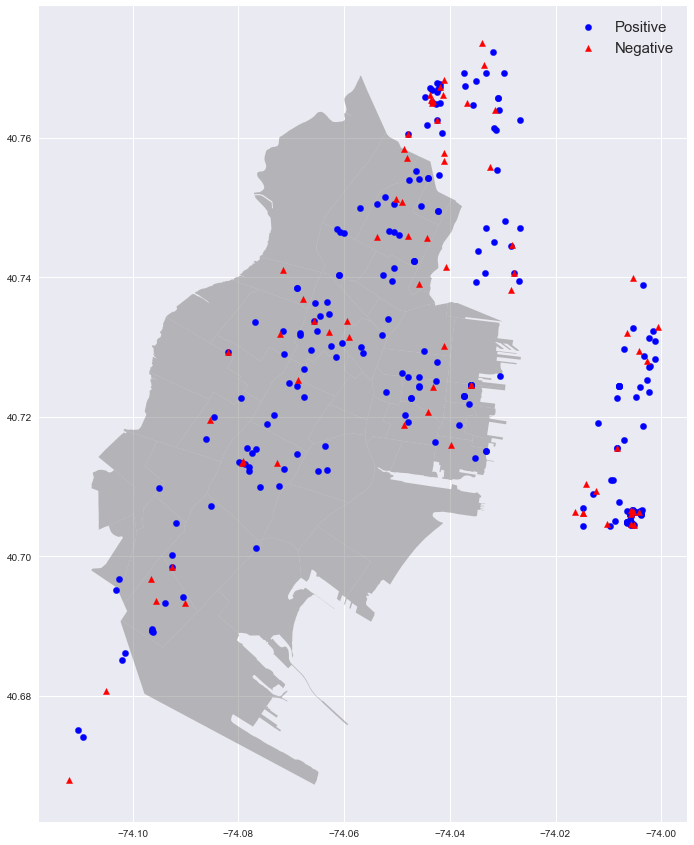

In [121]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha =  0.5, color = "grey")
geo_df[geo_df["pos"] > 0.9].plot(ax = ax, markersize = 40, color = "blue", marker = "o", label = "Positive")
geo_df[geo_df["neg"] > 0.3].plot(ax = ax, markersize = 40, color = "red", marker = "^", label = "Negative")
plt.legend(prop = {'size':15})

C:\Users\Empeekay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Empeekay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


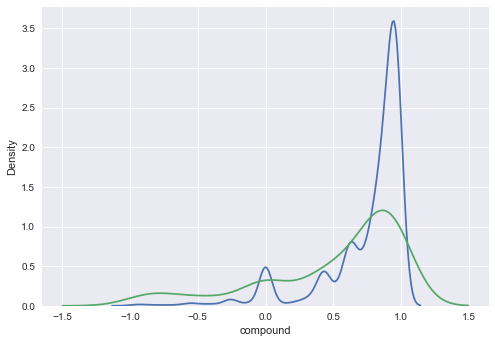

In [48]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [76]:
# feature selection
label = "is_bad_review"
ignore_cols = [label,"review_scores_value","is_good_review","listing_id","price","comments","reviews", "review_clean","name","location","neighbourhood","neighbourhood_cleansed","latitude","longitude"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)

In [77]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)


,feature,importance
10,doc2vec_vector_4,0.028792
6,doc2vec_vector_0,0.028151
7,doc2vec_vector_1,0.027493
8,doc2vec_vector_2,0.027011
9,doc2vec_vector_3,0.026880
4,nb_chars,0.019222
3,compound,0.017530
2,pos,0.015160
1,neu,0.014730
5,nb_words,0.014193


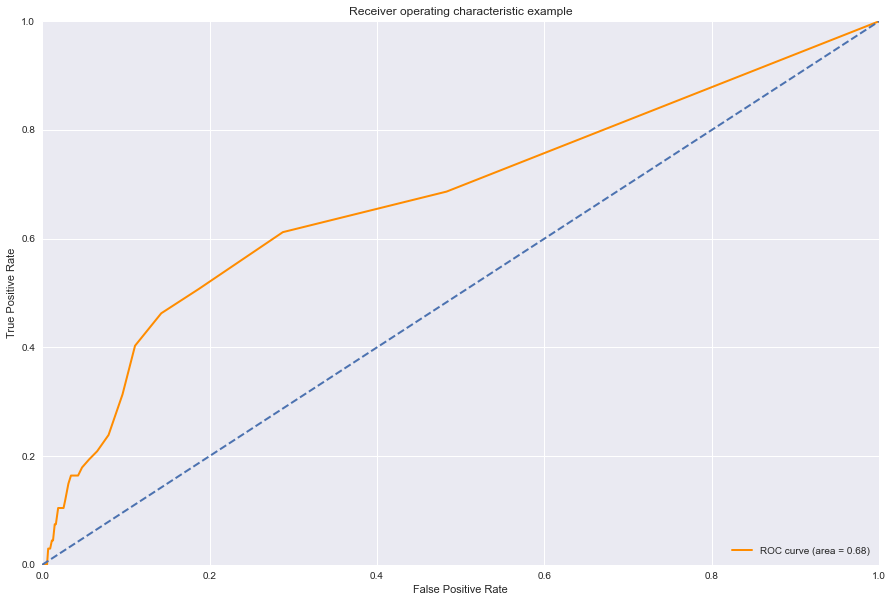

In [78]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [86]:
# PR curve

from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.utils.fixes import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

ImportError: cannot import name 'signature' from 'sklearn.utils.fixes' (C:\Users\Empeekay\anaconda3\lib\site-packages\sklearn\utils\fixes.py)

In [97]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install shapely.geometry

ERROR: Could not find a version that satisfies the requirement shapely.geometry (from versions: none)
ERROR: No matching distribution found for shapely.geometry

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
